# Identify creative dishes: Sushi & Sandwiches  <a class="tocSkip">
    
**Deep Learning assignment with public available data** 

Angel Martinez-Tenor 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Description" data-toc-modified-id="Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Description</a></span></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Explore-the-data" data-toc-modified-id="Explore-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Explore the data</a></span></li><li><span><a href="#ML-Modelling" data-toc-modified-id="ML-Modelling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ML Modelling</a></span><ul class="toc-item"><li><span><a href="#Create-image-generators-with-data-augmentation" data-toc-modified-id="Create-image-generators-with-data-augmentation-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Create image generators with data augmentation</a></span></li><li><span><a href="#Use-a-pre-trained-convolutional-model-to-extract-the-bottleneck-features" data-toc-modified-id="Use-a-pre-trained-convolutional-model-to-extract-the-bottleneck-features-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Use a pre-trained convolutional model to extract the bottleneck features</a></span></li><li><span><a href="#Build-and-train-the-top-classifier" data-toc-modified-id="Build-and-train-the-top-classifier-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Build and train the top classifier</a></span></li><li><span><a href="#Build-the-complete-trained-model" data-toc-modified-id="Build-the-complete-trained-model-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Build the complete trained model</a></span></li></ul></li><li><span><a href="#Make-predictions,-and-the-identified-potential-dishes" data-toc-modified-id="Make-predictions,-and-the-identified-potential-dishes-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Make predictions, and the identified potential dishes</a></span></li><li><span><a href="#Analysis-of-results-and-&amp;-Future-work" data-toc-modified-id="Analysis-of-results-and-&amp;-Future-work-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Analysis of results and &amp; Future work</a></span></li></ul></div>

# Description

<b>Goal:</b> Identify samples that could potentially be considered as a combination of two dishes given their pictures

<b> Input: </b> Two separated folders with pictures of each class. The example provided here uses a dataset with 402 pictures of sandwiches and 402 pictures of sushi. [Link](http://research.us-east-1.s3.amazonaws.com/public/sushi_or_sandwich_photos.zip)

Only the best model obtained is shown here: MobileNet with input size (224,224) pre-trained with Imagenet with a small fully connected classified trained and tuned with this data.

This implementation is largely influenced and reuses code from the following sources:

- [Francois Chollet: 'Building powerful image classification models using very little data'](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)  (main guide)

- [Bharat Kunwar: 'Sushi or Sandwich classifier'](https://github.com/brtknr/SushiSandwichClassifier/blob/master/sushi-or-sandwich-keras.ipynb) (base classifier)

- [Angel Martinez-Tenor: 'Data science projects with Keras'](https://github.com/angelmtenor/data-science-keras) (setup, structure, and helper functions)

# Setup

Download, extract & split the pictures (train, validation)

In [1]:
%matplotlib inline

import potential_dishes as di

# Download, extract & split the pictures (train, validation)
di.setup()

device:GPU:0
Keras		v2.9.0
TensorFlow	v2.9.1

Pictures:
sandwich   	402
sushi   	402
old train directory deleted
empty train directory created
old validation directory deleted
empty validation directory created

Sets:
train sandwich  282
train sushi  282
validation sandwich  120
validation sushi  120

setup .... OK


# Explore the data

pictures:
sandwich   	402
sushi   	402


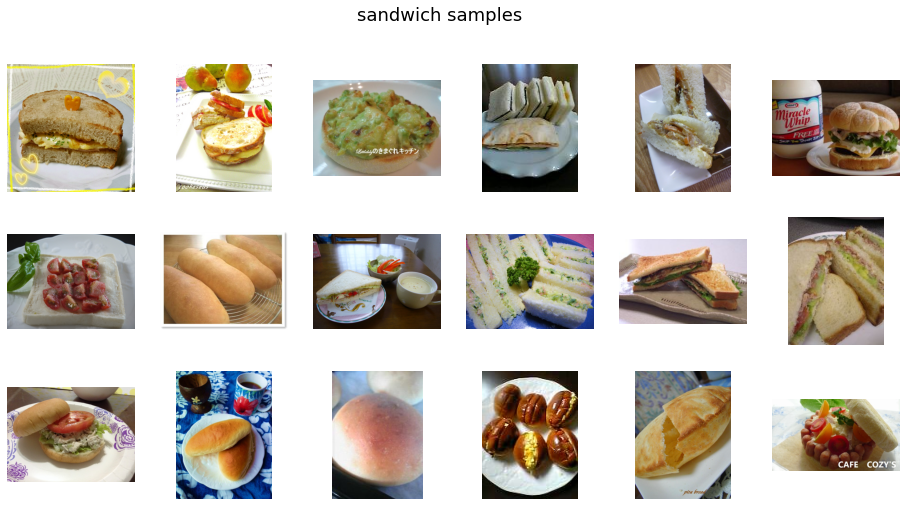

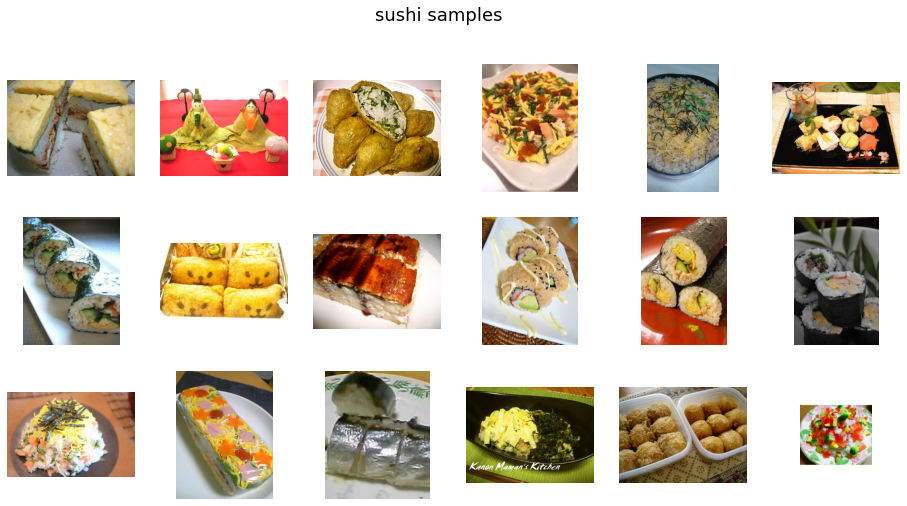

In [2]:
di.plot_samples()

# ML Modelling

## Create image generators with data augmentation

In [3]:
train_datagen, val_datagen = di.create_image_generators()

## Use a pre-trained convolutional model to extract the bottleneck features

In [4]:
(
    model_bottleneck,
    train_bottleneck,
    val_bottleneck,
    train_labels,
    val_labels,
) = di.get_bottleneck(train_datagen, val_datagen)


Image generators:
Found 564 images belonging to 2 classes.
Found 240 images belonging to 2 classes.

 Extracting bottleneck features:
8/8 [==============================] - 2s 235ms/step


##  Build and train the top classifier

Top classifier:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 16)                802832    
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 802,849
Trainable params: 

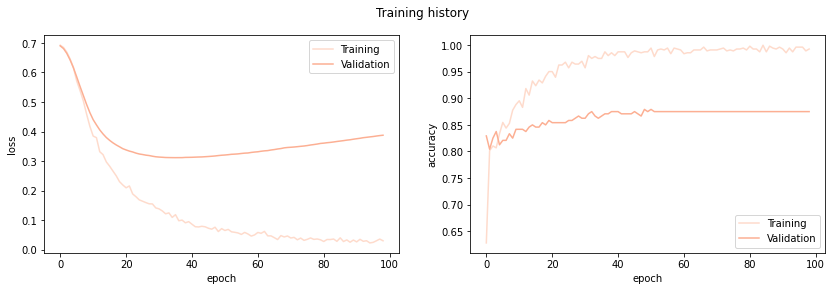


Training loss:  	0.0299
Validation loss: 	0.3874

Training accuracy: 	0.993
Validation accuracy:	0.875

Best model. Validation accuracy: 	 0.879


In [5]:
model_top = di.build_top_nn(input_shape=train_bottleneck.shape[1:], summary=True)
model_top = di.train_nn(
    model_top,
    train_bottleneck,
    val_bottleneck,
    train_labels,
    val_labels,
    show_plots=True,
)

##  Build the complete trained model

In [6]:
full_model = di.build_full_model(model_bottleneck, model_top)

# Make predictions, and the identified potential dishes

Potential Dishes = pictures misclassified or with output (sigmoid) $\in$ (0.45, 0.55). Only the validation set is used here to avoid trained samples


Potential combinations of Sandwich and Sushi:

Found 240 images belonging to 2 classes.
1/1 [==============================] - 1s 642ms/step

35 files saved in 'output'



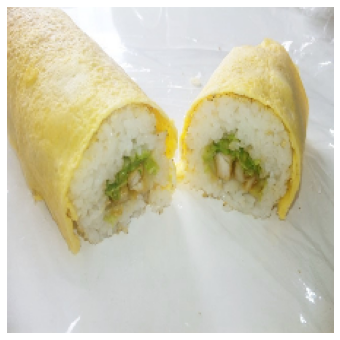

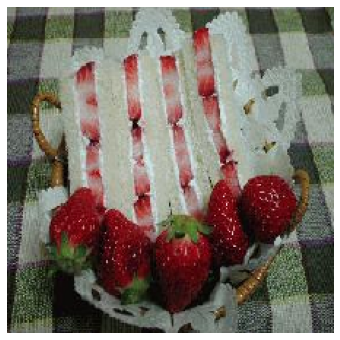

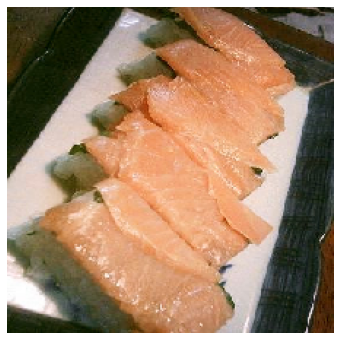

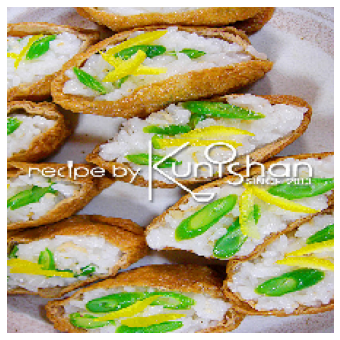

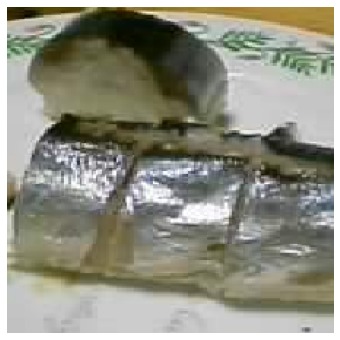

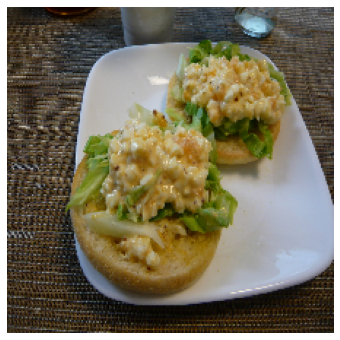

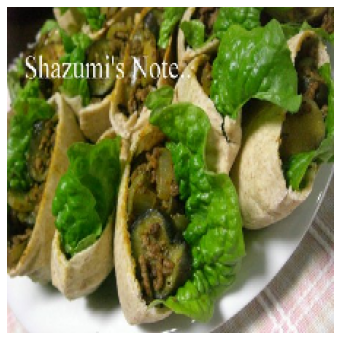

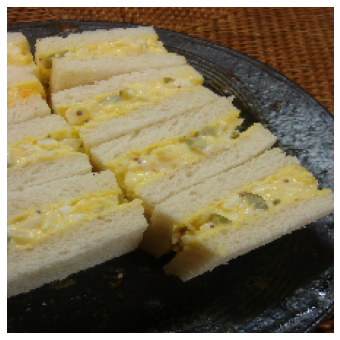

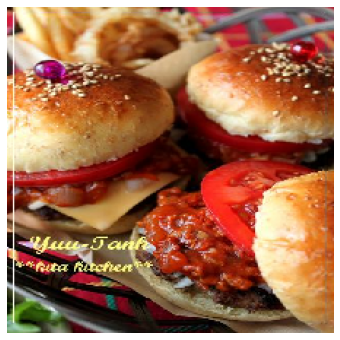

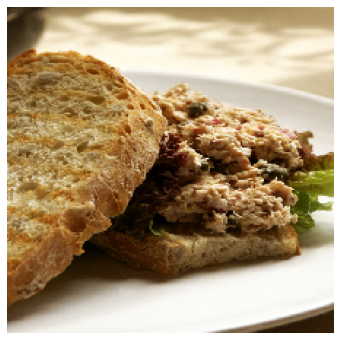

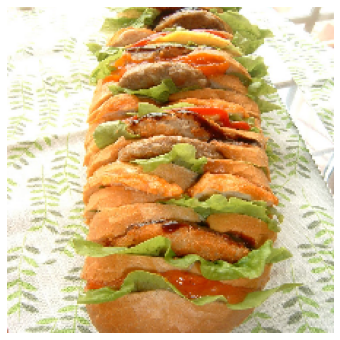

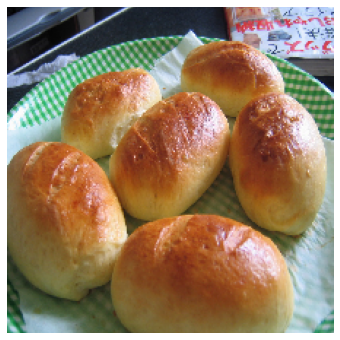

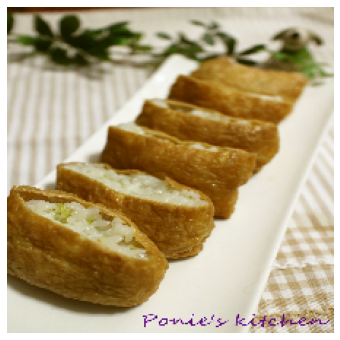

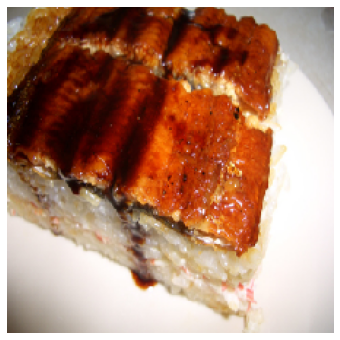

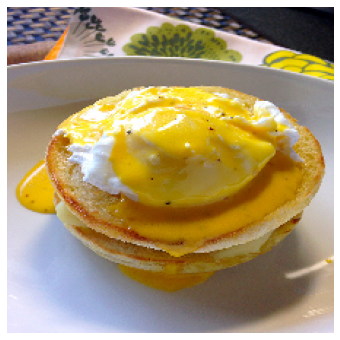

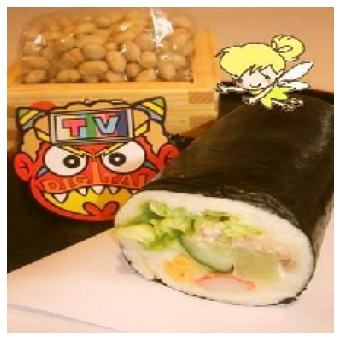

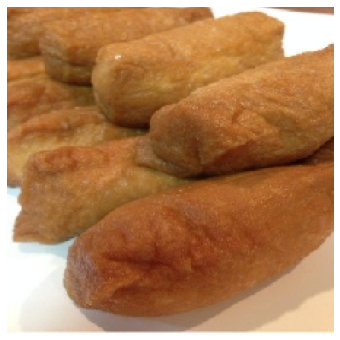

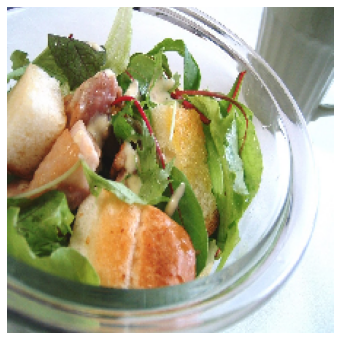

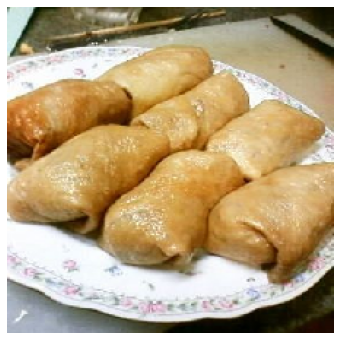

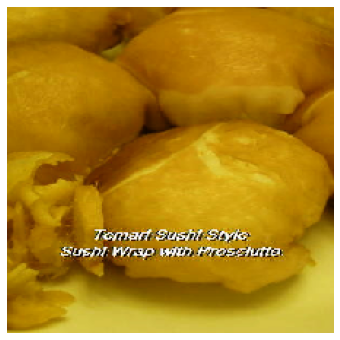

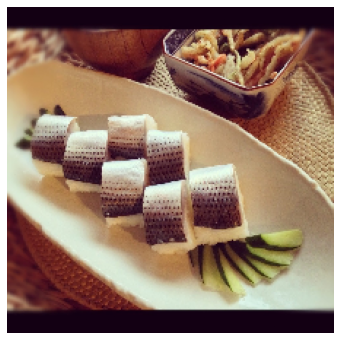

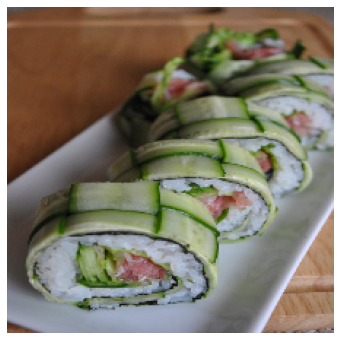

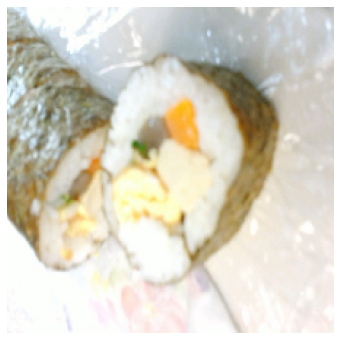

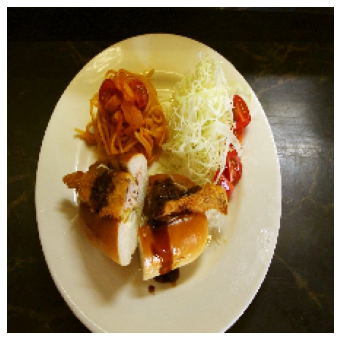

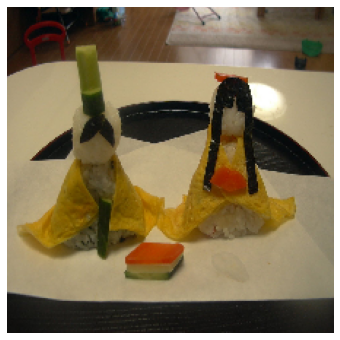

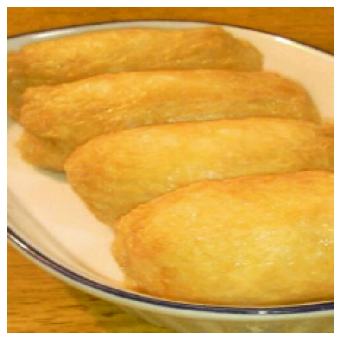

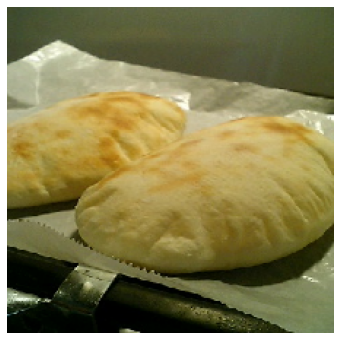

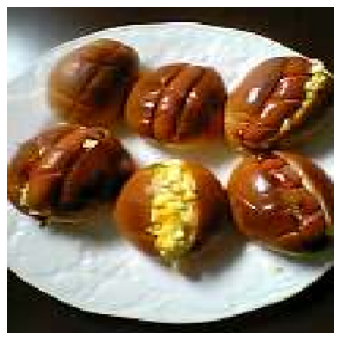

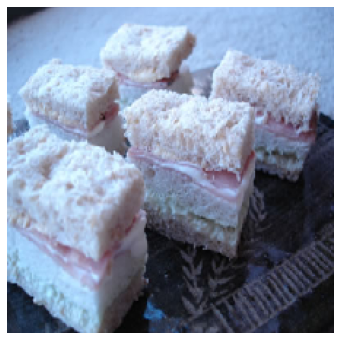

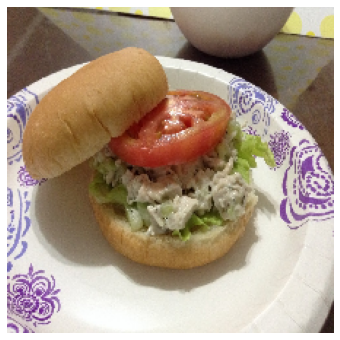

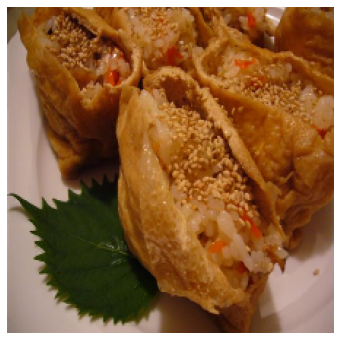

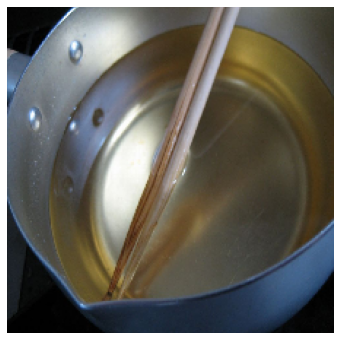

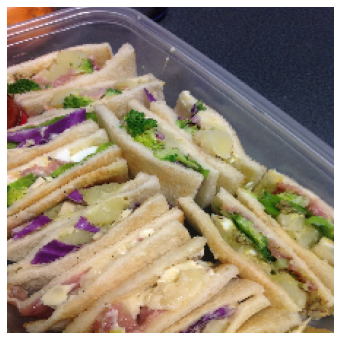

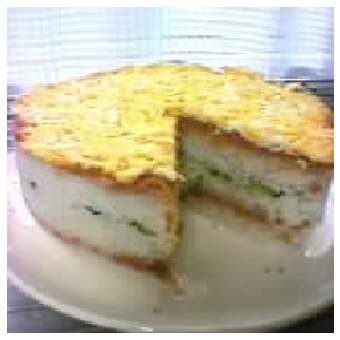

In [7]:
di.predict_and_save_potential_dishes(full_model, val_datagen)

# Analysis of results and & Future work

The best model obtained, based on transfer learning with a pre-trained MobileNet, achieved accuracies between 89-92% on the validation set. Less than 80% of accuracy was obtained with smaller custom convolutional models without transfer learning.

The generator of the augmented images used to train the classifier is based on the fact that the dishes are usually centered and photographed from different angles.

The identified potential dishes contain both actual potential combination and no combination at all. New potential dishes can be obtained by changing the 'SEED' parameter in the main script (different validation set).

Better accuracies of the classifier can be obtained by training with a large dataset or by fine-tuning the top layers of the pre-trained MobileNet network. However, it is likely that the identification of potential dishes does not improve. 

Alternate advanced methods could include Style Transfer or using Generative Adversarial Networks for combining data, as [RemixNet](https://ieeexplore.ieee.org/document/7889574).